# 4-1 초기 인공지능 알고리즘과 로지스틱 회귀

## 퍼셉트론
* $$z=b+\sum_{i=1}^{n}w_ix_i$$
* 활성화 함수로는 계산 함수를 사용
* 계단 함수의 결과를 역방향 계산하는데 쓴다.

## 아달린
* 퍼셉트론을 개선한 적응형 선형 뉴런(Adaptive Linear Neuron)
* 퍼셉트론과 다르게 선형 함수 출력 이후에 역방향 계산이 일어남

## 로지스틱 회귀
* logistic regression 아달린에서 조금 더 발전한 형태
* 활성화 함수 사용
* 퍼셉트론의 계단 함수와 비슷한 임계 함수 사용, 임계 함수는 입력으로 활서오하 함수의 출력을 받음
* 활성화 함수는 비선형 함수 사용

# 4-2 시그모이드 함수

## 시그모이드 함수의 역할
* 로지스틱 회귀의 활성화 함수로 사용
* 시그모이드 함수를 통과하면 확률이 나온다.

## 시그모이드 함수 만들어지는 과정
* 오즈 비 > 로짓 함수 > 시그모이드 함수

### 오즈 비
$$OR(odds ratio)=\frac{p}{1-p}(p = 성공 확률)$$

### 로짓 함수
$$logit(p) = \log(\frac{p}{1-p})$$
$$z = \log(\frac{p}{1-p})$$
p=0.5 일때 0이되고 p가 0과 1로 갈 수록 무한대로 음수와 양수가 됨

### 시그모이드 함수
로짓 함수에서 z에 대해 정리
$$p = \frac{1}{1+e^{-z}}$$
S자 형태의 그래프

## 중간 정리
선형 회귀에서 손실 함수로 제곱 오차를 사용했듯 로지스틱 회귀를 위한 로지스틱 손실 함수가 있다.

# 4-3 로지스틱 손실 함수를 경사 하강법에 적용

## 로지스틱 손실 함수
다중 분류를 위한 손실 함수 크로스 엔트로피(cross entropy) 손실 함수의 이진 분류 버전
$$L=-(y\log(a) + (1-y)\log(1-a))\\
y: 타깃값, a: 활성화 함수 출력값$$

## 로지스틱 손실 함수 미분

$$
\frac{\partial}{\partial w_i}L = -(y-a)x_i \\
\frac{\partial}{\partial b}L = -(y-a)1 \\
$$

### 유도과정
연쇄법칙(chain rule)사용
$$
\frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial w_i} \\
\frac{\partial L}{\partial a} = -(y\frac{1}{a} -(1-y)\frac{1}{1-a}) \\
\frac{\partial a}{\partial z} = a(1-a) \\
\frac{\partial z}{\partial w_i} = x_i
$$

## 역전파로 가중치와 절편 업데이트
* 가중치 업데이트
$$w_i = w_i +(y-a)x_i$$
* 절편 업데이트
$$b = b +(y-a)1$$

# 4-4 분류용 데이터 셋 준비

## 유방암 데이터 셋
* 특징 10개에 대하여 평균, 표준 오차, 최대 이상치 기록
* 이진 분류 문제


## 데이터 셋 준비

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load_breast_cancer() 함수로 데이터 셋 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [6]:
# 입력 데이터 확인
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


569개의 샘플과 30개의 특성

In [7]:
# 데이터 3개 출력
print(cancer.data[:3])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]


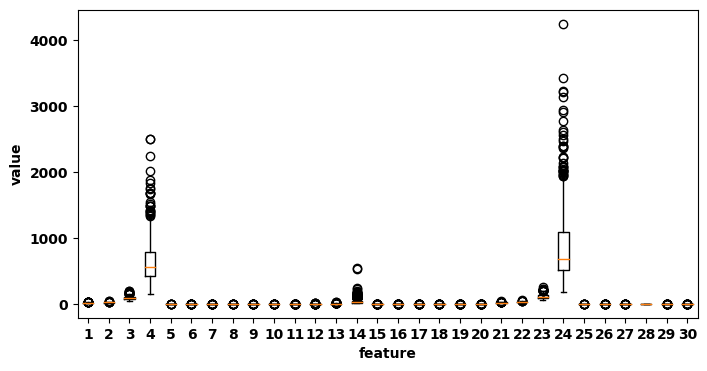

In [13]:
# 박스 플롯으로 특성 사분위 관찰
plt.figure(figsize=(8,4))
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [16]:
# 눈에 띄는 특성 살펴보기(4, 14, 24번째 특성)
cancer.feature_names[[3, 13, 23]]
# 3개의 특성 모두 넓이와 관련된 특성임

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [20]:
# 타깃 데이터 확인
np.unique(cancer.target, return_counts=True)
# 0은 음성 데이터(암x) - 212개, 1은 양성 데이터(암o) - 357개

(array([0, 1]), array([212, 357], dtype=int64))

In [21]:
# 훈련 데이터 셋 저장
x = cancer.data
y = cancer.target

# 4-5 로지스틱 회귀 뉴런

## 모델 성능 평가를 위한 훈련 세트와 테스트 세트
규칙
* 테스트 세트보다 훈련 세트가 많아야 한다.
* 훈련 데이터 세트를 나누기 전에 양성, 음성 클래스가 훈련 세트나 테스트 세트의 어느 한쪽에 몰리지 않도록 골고루 섞어야 한다.

## 훈련 세트와 테스트 세트 나누기
훈련 세트와 테스트 세트에 양성과 음성의 비율이 일정하게 나뉘어야 한다.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

* stratify=y
  * 훈련 데이트를 나눌 때 클래스 비율을 동일하게 한다.
* test_size=0.2
  * 테스트 세트의 비율 설정
* random_state=42
  * 무작위로 데이터 세트를 섞은 다음 나누는 결과 일정하게 함

In [24]:
# 결과 확인
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [25]:
# 훈련 세트의 타깃 확인
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

## 로지스틱 회귀 구현

In [27]:
class LogisticNeuron:
    # 3장에서 구현한 뉴런과 다르게 가중치와 절편을 초기화 하지 않는다.
    def __init__(self):
        self.w = None
        self.b = None

    # 넘파이 함수를 상용한다.
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z

    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad

## 훈련 메서드 구현

In [28]:
def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
        for x_i, y_i in zip(x, y):
            # 정방향 계산
            z = self.forpass(x_i)
            # 활성화 함수 적용
            a = self.activation(z)
            # 오차 계산
            err = -(y_i - a)
            # 역방향 계산
            w_grad, b_grad = self.backprop(x_i, err)
            # 가중치, 절편 업데이트
            self.w -= w_grad
            self.b -= b_grad

In [29]:
# activation() 메서드 구현(시그모이드 함수 사용)
def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

## 예측 메서드 구현

In [30]:
# predict() 메서드 구현
def predict(self, x):
    # 선형 함수 적용
    z = [self.forpass(x_i) for x_i in x]
    # 활성화 함수 적용
    a = self.activation(np.array(z))
    # 계단 함수 적용
    return a > 0.5

## 구현 정리

In [33]:
class LogisticNeuron:
    # 3장에서 구현한 뉴런과 다르게 가중치와 절편을 초기화 하지 않는다.
    def __init__(self):
        self.w = None
        self.b = None

    # 넘파이 함수를 상용한다.
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z

    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                # 정방향 계산
                z = self.forpass(x_i)
                # 활성화 함수 적용
                a = self.activation(z)
                # 오차 계산
                err = -(y_i - a)
                # 역방향 계산
                w_grad, b_grad = self.backprop(x_i, err)
                # 가중치, 절편 업데이트
                self.w -= w_grad
                self.b -= b_grad

    def activation(self, z):
        # 오버플로우 방지를 위해 적용
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a

    def predict(self, x):
        # 선형 함수 적용
        z = [self.forpass(x_i) for x_i in x]
        # 활성화 함수 적용
        a = self.activation(np.array(z))
        # 계단 함수 적용
        return a > 0.5

## 모델 훈련

In [34]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

In [36]:
# 테스트 세트로 모델 정확도 평가
np.mean(neuron.predict(x_test) == y_test)

0.8245614035087719